1번 문제
========
1. num_1 폴더의 uriage 파일을 pandas를 이용하여 데이터프레임으로 불러온다. 
2. purchase_date 컬럼의 데이터 타입을 datetime을 변경한다. 
3. item_name 컬럼의 값을 대문자로 변경한다. 
4. item_name 컬럼의 공백을 지워준다. 
5. item_name 컬럼을 기준으로 오름차순 정렬한다. 
6. 데이터의 결측치가 존재하는지 확인한다. 
7. item_price 컬럼의 결측치의 값을 해당하는 item_name의 맥스값으로 치환하여 준다. 

In [19]:
import pandas as pd
uriage_data = pd.read_csv("./num_1/uriage.csv")     #csv 파일 불러오기
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [20]:
uriage_data["purchase_date"] = pd.to_datetime(uriage_data["purchase_date"])     #해당 컬럼의 데이터의 형태를 datatime으로 변경
uriage_data

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1,2019-07-13 13:05:00,상 품 S,NaN,김우찬
2,2019-05-11 19:42:00,상 품 a,NaN,김유찬
3,2019-02-12 23:40:00,상품Z,2600.0,김재현
4,2019-04-22 03:09:00,상품a,NaN,김강현
...,...,...,...,...
2994,2019-02-15 02:56:00,상품Y,2500.0,김정민
2995,2019-06-22 04:03:00,상품M,1300.0,김재원
2996,2019-03-29 11:14:00,상품Q,NaN,김지율
2997,2019-07-14 12:56:00,상품H,NaN,김승주


In [21]:
uriage_data["purchase_date"] = uriage_data["purchase_date"].apply(lambda x : x.strip())
uriage_data

AttributeError: 'Timestamp' object has no attribute 'strip'

In [ ]:
uriage_data["item_name"] = uriage_data["item_name"].str.upper()     # 해당 컬럼의 값들을 대문자형으로 변환
uriage_data["item_name"] = uriage_data["item_name"].str.replace(" ", "")    # 해당 컬럼의 공백을 없애준다.
uriage_data.sort_values(by=["item_name"], ascending=True, inplace=True)     # 해당 컬럼을 오름차순으로 변경. 원본 데이터를 수정
uriage_data

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1748,2019-05-19 20:22:00,상품A,100.0,김시훈
223,2019-06-25 08:13:00,상품A,100.0,김유진
1742,2019-06-13 16:03:00,상품A,100.0,김건희
1738,2019-02-10 00:28:00,상품A,100.0,김하랑
...,...,...,...,...
2880,2019-04-22 00:36:00,상품Y,NaN,김동욱
2881,2019-04-30 14:21:00,상품Y,NaN,김하준
1525,2019-01-24 10:27:00,상품Y,2500.0,김범준
1361,2019-05-28 13:45:00,상품Y,2500.0,김수현


In [ ]:
uriage_data.isnull().any(axis=0)    # 모든 컬럼의 null값의 유무를 보여준다. 

purchase_date    False
item_name        False
item_price        True
customer_name    False
dtype: bool

In [ ]:
uriage_data.isna().any(axis=0)

purchase_date    False
item_name        False
item_price        True
customer_name    False
dtype: bool

In [ ]:
flg_is_null = uriage_data["item_price"].isnull()
uriage_data.loc[flg_is_null, "item_name"].unique()

array(['상품A', '상품B', '상품C', '상품D', '상품E', '상품F', '상품G', '상품H', '상품I',
       '상품J', '상품K', '상품L', '상품M', '상품N', '상품O', '상품P', '상품Q', '상품R',
       '상품S', '상품T', '상품U', '상품V', '상품W', '상품X', '상품Y'], dtype=object)

In [ ]:
uriage_data.loc[(~flg_is_null) & (uriage_data["item_name"] == "상품A"), "item_price"].max()

100.0

In [ ]:
flg_is_null = uriage_data["item_price"].isnull()    # item_price의 null 값의 유무를 변수에 지정 데이터의 형태는 스리즈

for trg in list(uriage_data.loc[flg_is_null, "item_name"].unique()):
    price = uriage_data.loc[(~flg_is_null) & (uriage_data["item_name"] == trg), "item_price"].max()
    uriage_data["item_price"].loc[(flg_is_null) & (uriage_data["item_name"]==trg)] = price

uriage_data

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1748,2019-05-19 20:22:00,상품A,100.0,김시훈
223,2019-06-25 08:13:00,상품A,100.0,김유진
1742,2019-06-13 16:03:00,상품A,100.0,김건희
1738,2019-02-10 00:28:00,상품A,100.0,김하랑
...,...,...,...,...
2880,2019-04-22 00:36:00,상품Y,2500.0,김동욱
2881,2019-04-30 14:21:00,상품Y,2500.0,김하준
1525,2019-01-24 10:27:00,상품Y,2500.0,김범준
1361,2019-05-28 13:45:00,상품Y,2500.0,김수현


2번 문제 
===========

1. num_2 폴더 내에 있는 csv 파일을 모두 데이터프레임으로 불러온다. 
2. transaction_1과 transaction_2를 유니언 결합을 한다. 
3. transaction_detail_1과 transaction_detail_2를 유니언 결합을 한다. 
4. 2,3 번의 데이터프레임의 값을 조인 결합을 한다. 
5. 4번 작업한 데이터프레임을 customer_master, item_master 와 조인 결합한다. 
6. quantity와 item_price의 곱한 값으로 price라는 컬럼을 생성한다. 
7. payment_date컬럼의 데이터형태를 datetime으로 변경한다. 
8. payment_date값의 년 월값만 추출하여 payment_month 컬럼을 생성한다. 
9. groupby를 이용하여 월별, 상품별 price와 quantity의 합계를 출력한다. 


In [23]:
import pandas as pd
customer_master = pd.read_csv('./num_2/customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [24]:
item_master = pd.read_csv('./num_2/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [25]:
transaction_1 = pd.read_csv('./num_2/transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [26]:
transaction_detail_1 = pd.read_csv('./num_2/transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [27]:
# 유니온 결합 데이터프레임의 행을 추가하는 작업 concat 함수를 사용한다. ignore_index = True는 인덱스를 재배열 하는 것
transaction_2 = pd.read_csv('./num_2/transaction_2.csv')
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)  
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [28]:
#데이터프레임의 행의 수가 증가한 것을 확인할 수 있다. 
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [29]:
transaction_detail_2 = pd.read_csv('./num_2/transaction_detail_2.csv')
transaction_detail=pd.concat([transaction_detail_1,transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [45]:
# 조인 결합 데이터 프레임의 열을 추가한다. merge 함수를 사용한다. 
join_data = pd.merge(transaction_detail, transaction[["transaction_id", "payment_date", "customer_id"]], 
                     on="transaction_id", how="inner")
len(join_data)

6786

In [31]:
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


In [32]:
join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


In [33]:
join_data["price"] = join_data["quantity"] * join_data["item_price"]
join_data[["quantity", "item_price","price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [35]:
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m")
join_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [ ]:
join_data.groupby(["payment_month","item_name"]).sum()[["price", "quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

3번 문제
==========

1. num_3 폴더내의 drink 파일을 데이터프레임으로 불러온다. 
2. 대륙 컬럼인 continent 결측 데이터를 OT로 지정한다. 
3. 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산한다. 
4. 전체 평균보다 많은 알코올 섭취하는 대륙을 구한다. 
5. 3번 과정의 데이터를 바그래프를 이용하여 시각화 한다. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drinks = pd.read_csv('./num_3/drinks.csv') # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [ ]:
print(drinks.isnull().sum())

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64


In [ ]:
# 결측데이터를 처리합니다 : 기타 대륙으로 통합 -> 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [ ]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산합니다.
# 모든열에 여러 함수를 매핑 : group객체.agg([함수1,함수2,함수3,…])
# 각 열마다 다른 함수를 매핑 : group객체.agg({‘열1’: 함수1, ‘열2’:함수2, …})
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [ ]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다.
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


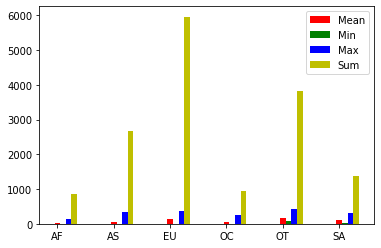

In [ ]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화합니다.
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()
 
index = np.arange(n_groups)
bar_width = 0.1
 
rects1 = plt.bar(index, means, bar_width,
                 color='r',
                 label='Mean')
 
rects2 = plt.bar(index + bar_width, mins, bar_width,
                 color='g',
                 label='Min')

rects3 = plt.bar(index + bar_width * 2, maxs, bar_width,
                 color='b',
                 label='Max')
 
rects3 = plt.bar(index + bar_width * 3, sums, bar_width,
                 color='y',
                 label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

In [50]:
DF1 = pd.DataFrame([["싸이",180,75],["덕구",160,65],["또치",170,75], ["덕구",180,85]], columns = ["이름","키","몸무게"])
DF1

,이름,키,몸무게
0,싸이,180,75
1,덕구,160,65
2,또치,170,75
3,덕구,180,85


In [51]:
DF2 = pd.DataFrame([["싸이","포워드","잘함"],["덕구","미드필더","못함"],["똥갈","수비수","잘함"]], columns = ["이름","포지션","실력"])
DF2

,이름,포지션,실력
0,싸이,포워드,잘함
1,덕구,미드필더,못함
2,똥갈,수비수,잘함


In [52]:
pd.merge(left = DF1 , right = DF2, how = "inner", on = "이름")

,이름,키,몸무게,포지션,실력
0,싸이,180,75,포워드,잘함
1,덕구,160,65,미드필더,못함
2,덕구,180,85,미드필더,못함
